<a href="https://colab.research.google.com/github/samar018/BlockClassification-using-food-habits-and-clinical-data/blob/main/DecisionTreewithCrossValidationandROC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
""" DATA Import and Test"""

import pandas as pd
dataset = pd.read_csv('HeartBlock.csv')
X = dataset.iloc[:, 1:-2].values
y = dataset.iloc[:,26].values



print(X.shape)
print(y.shape)
print(X.shape[0] != y.shape[0])


print(dataset.head())
print(y)
print(X[5])

(301, 24)
(301,)
False
       Age      Sex  Work  Smoking  chewingtobacoo     BpSys    BpDias  HTN  \
0       45        1     0        2               0       130        90    1   
1       75        1     2        4               1       120        80    0   
2       50        1     0        4               0       130        90    1   
3       45        1     0        0               0       140        80    1   
4       35        0     1        4               1       100        80    0   

   Pulse  Diabetes  ...     HR    P-R  QRS  Interpol  AxisDev.  T-wave  \
0    100         3  ...   82.0  180.0   91         0         0       1   
1     70         0  ...   73.0  152.0   88         0         1       0   
2     56         0  ...   92.0  187.0  125         1         0       1   
3     78         0  ...   73.0  190.0   92         0         0       0   
4    100         0  ...  142.0  160.0  140         1         0       0   

   ST Slope  PR irregular  QRS Dropped  Block  
0        

In [ ]:
from sklearn.impute import SimpleImputer
import numpy as np


simpleImputer = SimpleImputer(missing_values = np.nan, strategy = 'median')
simpleImputer= simpleImputer.fit(X[:, 1:-1])
X[:, 1:-1] = simpleImputer.transform(X[:, 1:-1])

In [ ]:
print(X[22])

[  1.    0.    4.    0.   80.   60.    0.  110.    0.    3.    1.    0.
   1.    1.    0.    3.   78.  161.5  98.    0.    0.    2.    0.    1. ]


In [ ]:

from sklearn.preprocessing import label_binarize
y = label_binarize(y, classes=[0, 1, 2,3,4,5])
n_classes = y.shape[1]

In [ ]:
print(y)
print(n_classes)

[[1 0 0 0 0 0]
 [1 0 0 0 0 0]
 [0 0 0 0 1 0]
 ...
 [0 0 0 1 0 0]
 [0 0 0 1 0 0]
 [0 0 0 1 0 0]]
6


In [ ]:

# Add noisy features to make the problem harder
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

print(X.shape)

(301, 4824)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = ( DecisionTreeClassifier(criterion='gini', 
     splitter='best', max_depth=10, min_samples_split=80, min_samples_leaf=1,
     max_features=None, random_state=random_state ,max_leaf_nodes=5,class_weight=None))


In [ ]:
from sklearn.model_selection  import cross_val_predict
'''using cross validation'''
y_score_train = cross_val_predict(classifier, X, y, cv=10)

In [ ]:
print(y_score_train)

[[1 0 0 0 0 0]
 [1 0 0 0 0 0]
 [0 0 0 0 0 1]
 ...
 [1 0 0 0 0 0]
 [1 0 0 0 0 0]
 [0 1 0 0 0 0]]


In [ ]:
from sklearn.metrics import confusion_matrix

print("------------------- Data Evaluation----------------")
print(confusion_matrix(y.argmax(axis=1),y_score_train.argmax(axis=1)))

------------------- Data Evaluation----------------
[[51  0  0  4  1  0]
 [ 0 52  0  1  0  0]
 [ 0  0 44  0  2  0]
 [30 10  0  0  7  0]
 [11  3  1  0 33  6]
 [ 5  5  2  0 15 18]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y,y_score_train))


              precision    recall  f1-score   support

           0       0.61      0.91      0.73        56
           1       0.74      0.98      0.85        53
           2       0.94      0.96      0.95        46
           3       0.00      0.00      0.00        47
           4       0.57      0.61      0.59        54
           5       0.75      0.40      0.52        45

   micro avg       0.69      0.66      0.67       301
   macro avg       0.60      0.64      0.61       301
weighted avg       0.60      0.66      0.61       301
 samples avg       0.66      0.66      0.66       301



/home/god/softwares/miniconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)


In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y,y_score_train))


0.6578073089700996


In [ ]:
from sklearn.metrics import roc_curve, auc

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y[:, i], y_score_train[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
       
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y.ravel(), y_score_train.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
lw = 5
plt.plot(fpr[5], tpr[5], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()



<Figure size 640x480 with 1 Axes>

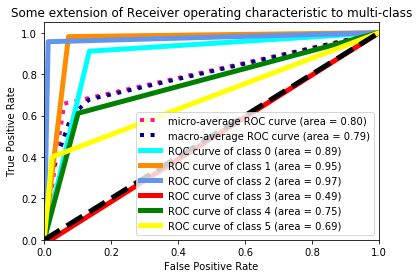

In [ ]:



# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

from scipy import interp

import itertools as it

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = it.cycle(['aqua', 'darkorange', 'cornflowerblue','red','green','yellow'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()